In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

# Impact

In [5]:
def make_dot_plots_by_nutrient_vehicle_pair(data, nutrient, measure, coverage_levels):
    """This function takes a dataframe,
    nutrient (as a string),
    and measure (as a string, either: 'rates', 'counts', or 'pifs').
    """

    f, ax = plt.subplots(figsize=(12, 4), dpi=120)
    colors = ['tab:red', 'tab:orange', 'tab:green']

    location_spacer = 0.15
    coverage_spacer = 0.025
    df = (data.drop(columns='measure', errors='ignore')
          .apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).reset_index())

    order = df.reset_index()
    order = list(
        order.loc[order.coverage_level == 0.8].loc[order.year == 2025].sort_values(by='mean').location_id.values)
    nums = list(range(0, len(order)))
    orders = pd.DataFrame()
    orders['location_id'] = order
    orders['order'] = nums
    df = df.merge(orders, on='location_id').sort_values(by='order', ascending=False)

    for n in list(range(0, len(coverage_levels))):
        rate = (df.loc[df.year == 2025]
            .loc[df.coverage_level == coverage_levels[n]])
        for i in list(range(0, len(rate))):
            plt.plot([location_spacer * i + coverage_spacer * n, location_spacer * i + coverage_spacer * n],
                     [rate['2.5%'].values[i], rate['97.5%'].values[i]], c='black', linewidth=1)
            plt.scatter([location_spacer * i + coverage_spacer * n], rate['2.5%'].values[i], s=10, marker='_',
                        c='black')
            plt.scatter([location_spacer * i + coverage_spacer * n], rate['97.5%'].values[i], s=10, marker='_',
                        c='black')

        x_vals = []
        for x in list(range(0, len(rate))):
            x_vals.append(location_spacer * x + coverage_spacer * n)
        plt.scatter(x_vals, rate['mean'], s=30,
                    label=f'{int(coverage_levels[n] * 100)} percent coverage scale-up', color=colors[n])

    plt.hlines(0, 0 - coverage_spacer * 2,
               location_spacer * (len(rate)) - coverage_spacer * 2,
               linestyle='dashed', color='grey', alpha=0.5)

    plt.plot()

    if measure == 'rates_averted':
        plt.title(f'DALYs averted per 100,000 person-years due to\n{nutrient} fortication in {vehicle}\n')
        plt.ylabel('DALYs Averted per 100,000')
    elif measure == 'counts_averted':
        plt.title(f'DALYs averted due to {nutrient} fortication in {vehicle}\n')
        plt.ylabel('DALYs')
    elif measure == 'pif':
        plt.title(f'Population impact fraction of {nutrient} fortication in {vehicle}\non DALYs as a proportion of {nutrient} deficiency attributable DALYs\n')
        plt.ylabel('Population Impact Fraction (Percent)')

    plt.legend(bbox_to_anchor=[1.3, 1])
    
    #rate = rate.merge(confidence_data.replace('vitamin a','vitamin A'), on=['location_name','nutrient','vehicle'])
    #rate['label'] = (np.where(rate.score == 5, '***** ',
    #                  np.where(rate.score == 4, '**** ',
    #                           np.where(rate.score == 3, '*** ',
    #                                    np.where(rate.score == 2, '** ',
    #                                             np.where(rate.score == 1, '* ', '')))))
    #               + rate.location_name)


    x_ticks = []
    for x in list(range(0, len(rate))):
        x_ticks.append(location_spacer * x + coverage_spacer)
    ax.set_xticks(x_ticks)
    plt.suptitle('Assuming 0% folic acid fortified salt at baseline and 70% fortifiable salt for all locations', y=0.925, fontsize='medium')
    plt.xticks(rotation=90)
    ax.set_xticklabels(rate.location_name.values)

In [10]:
salt = pd.read_pickle('results_raw/folic_acid_in_salt.pkl').reset_index().rename(columns={'year_id':'year'})
salt['nutrient'] = 'folic acid'
salt['vehicle'] = 'salt'
salt.head()

,index,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,...,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,measure,year,nutrient,vehicle
0,0,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6,counts_averted,2022,folic acid,salt
1,1,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6,counts_averted,2022,folic acid,salt
2,2,0.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6,counts_averted,2022,folic acid,salt
3,3,0.2,5124.608739,3769.933466,3462.296433,3307.406641,4563.720062,3647.907688,3058.731548,4488.616668,...,4061.798134,3773.140704,4372.339911,3257.797084,3856.134634,6,counts_averted,2023,folic acid,salt
4,4,0.5,12811.521849,9424.833665,8655.741084,8268.516601,11409.300154,9119.769220,7646.828871,11221.541670,...,10154.495335,9432.851760,10930.849777,8144.492710,9640.336586,6,counts_averted,2023,folic acid,salt


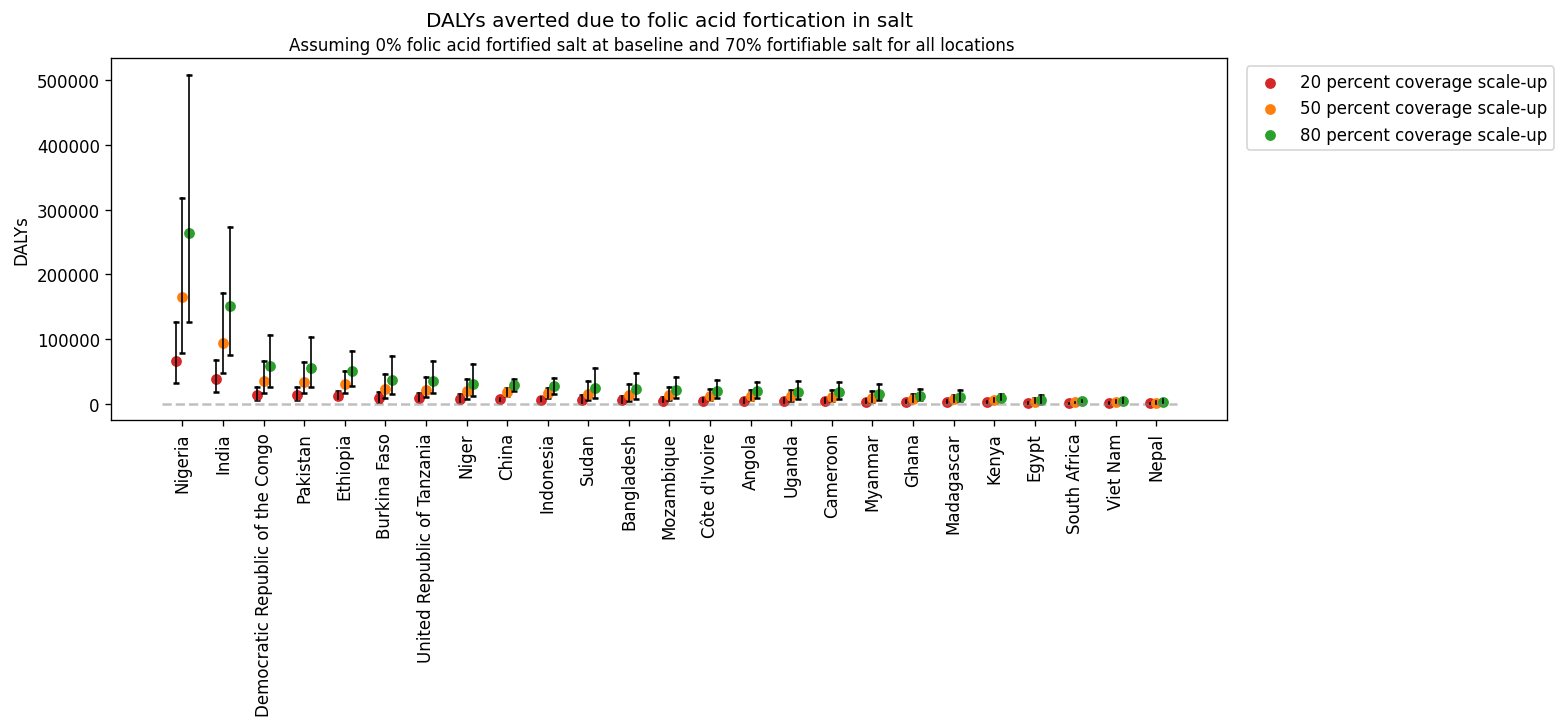

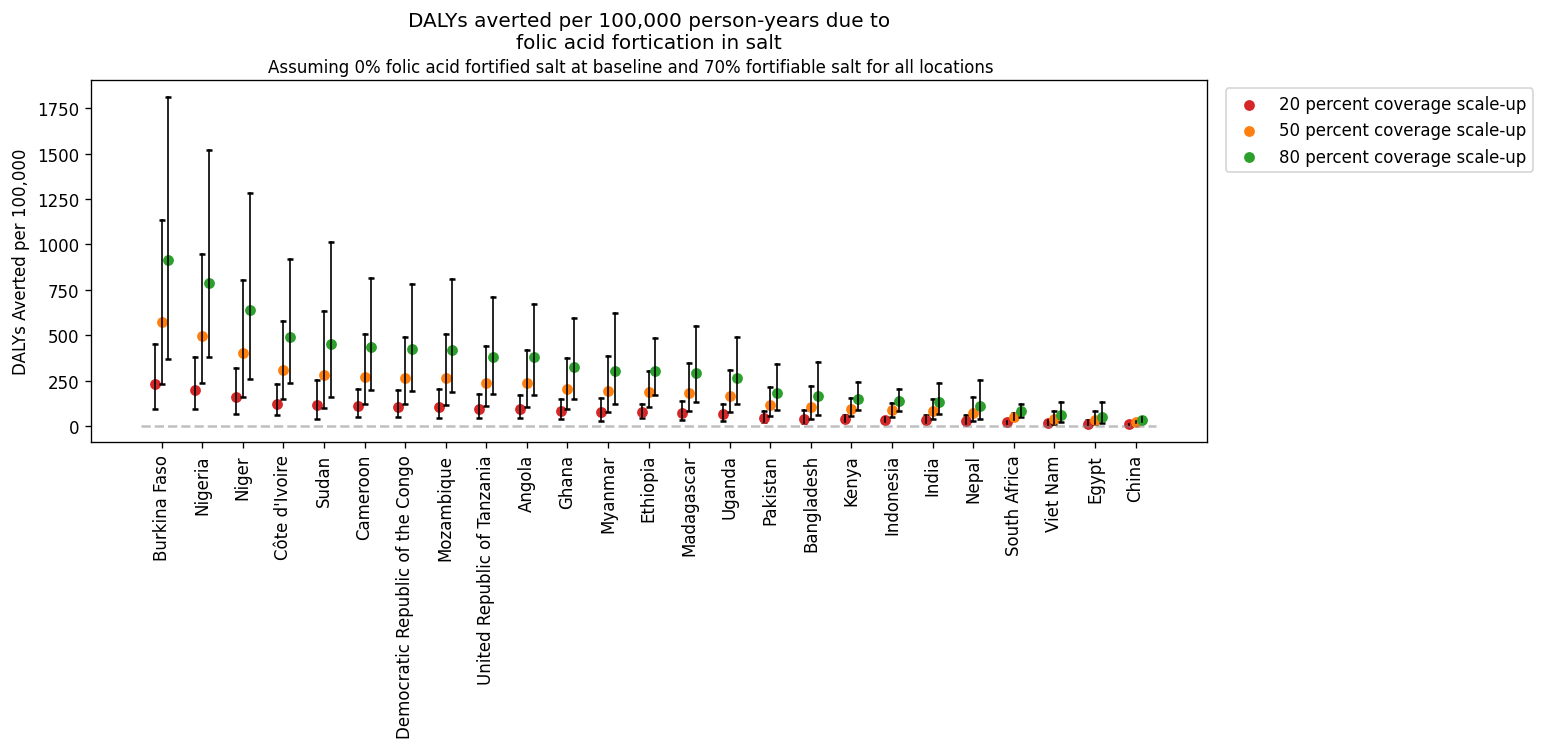

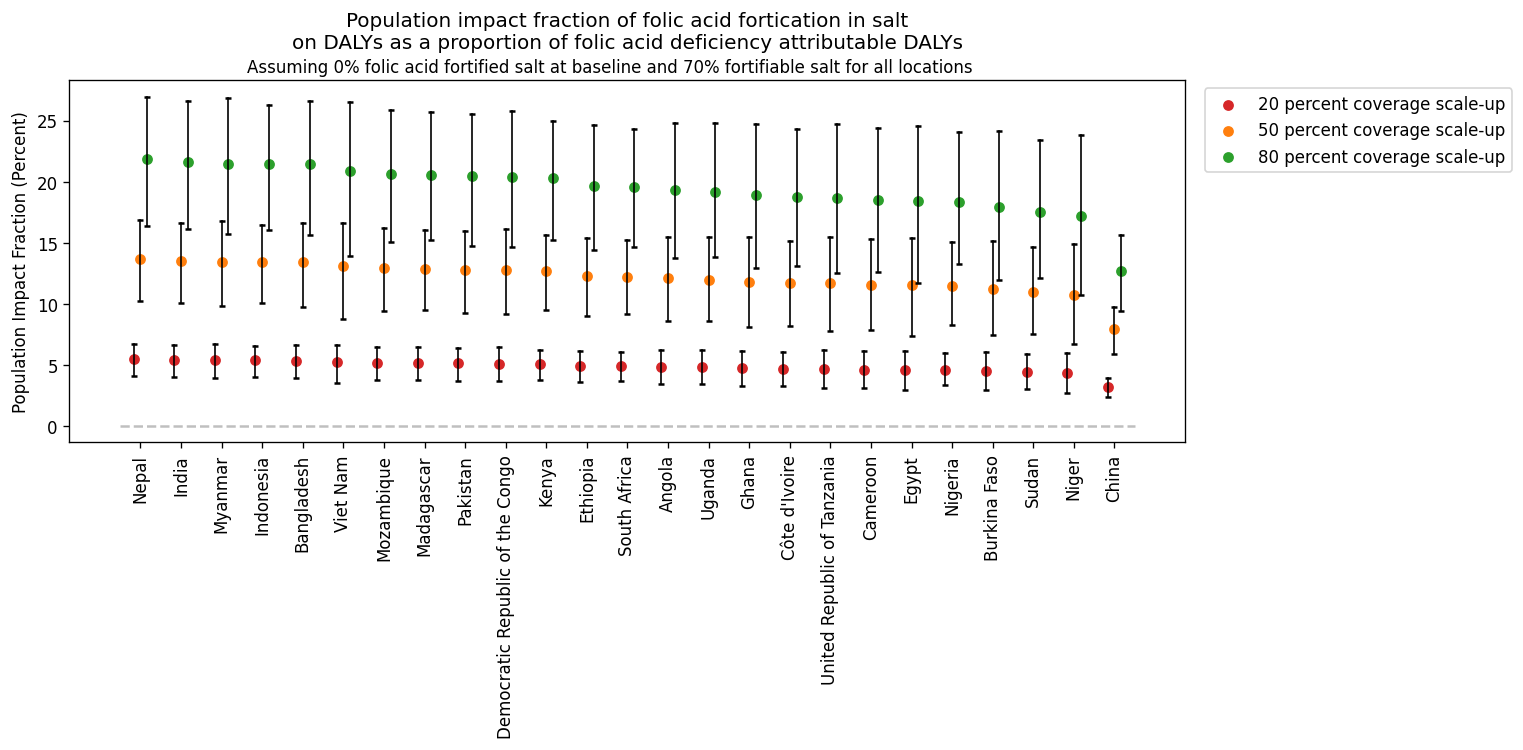

In [13]:
coverage_levels = [0.2,0.5,0.8]
nutrient='folic acid'
vehicle = 'salt'
measures = ['counts_averted','rates_averted','pif']
l = get_ids('location')
for measure in measures:
    plot = (salt.loc[salt.year == 2025]
            .loc[salt.measure==measure]
            .merge(l.filter(['location_name','location_id']), on='location_id'))
    plot = plot.set_index([c for c in plot.columns if 'draw' not in c])
    make_dot_plots_by_nutrient_vehicle_pair(plot,
                  nutrient,
                  measure,
                  coverage_levels)

In [14]:
coverage_levels = [0.2,0.5,0.8]

def make_location_specific_plots(data, location_id, measure, coverage_levels):
    data_loc = (data
                .loc[data.location_id==location_id]
                .loc[data.year==2025]
                .loc[data.measure == measure]
                .sort_values(by=['nutrient','vehicle']))
    
    f, ax = plt.subplots(figsize=(7, 4), dpi=120)
    colors = ['tab:red', 'tab:orange', 'tab:green']
    nutrient_spacer = 0.15
    coverage_spacer = 0.025
    data_loc = (data_loc.set_index([c for c in data_loc.columns if 'draw' not in c])
                .apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).reset_index())
    
    for n in list(range(0, len(coverage_levels))):
        df = (data_loc.loc[data_loc.coverage_level == coverage_levels[n]])
        for i in list(range(0, len(df))):
            plt.plot([nutrient_spacer * i + coverage_spacer * n, nutrient_spacer * i + coverage_spacer * n],
                     [df['2.5%'].values[i], df['97.5%'].values[i]], c='black', linewidth=1)
            plt.scatter([nutrient_spacer * i + coverage_spacer * n], df['2.5%'].values[i], s=10, marker='_',
                        c='black')
            plt.scatter([nutrient_spacer * i + coverage_spacer * n], df['97.5%'].values[i], s=10, marker='_',
                        c='black')
            
        x_vals = []
        for x in list(range(0, len(df))):
            x_vals.append(nutrient_spacer * x + coverage_spacer * n)
        plt.scatter(x_vals, df['mean'], s=30,
                    label=f'{int(coverage_levels[n] * 100)} percent coverage', color=colors[n])

    plt.hlines(0, 0 - coverage_spacer * 2,
               nutrient_spacer * (len(df)) - coverage_spacer * 2,
               linestyle='dashed', color='grey', alpha=0.5)
    
    plt.plot()
    
    l_name = data_loc.location_name.values[0]

    if measure == 'rates_averted':
        plt.title(f'{l_name}\nDALYs Averted per 100,000 Person-Years by Nutrient')
        plt.ylabel('DALYs Averted per 100,000')
    elif measure == 'counts_averted':
        plt.title(f'{l_name}\nDALYs Averted by Nutrient')
        plt.ylabel('DALYs')
    elif measure == 'pif':
        plt.title(f'{l_name}\nPopulation Impact Fractions by Nutrient\nDALYs Averted as a Fraction of DALYs Attributable to Respective Nutrient Deficiencies')
        plt.ylabel('Population Impact Fraction (Percent)')

    plt.legend(bbox_to_anchor=[1.5, 1])
    
    x_ticks = []
    for x in list(range(0, len(df))):
        x_ticks.append(nutrient_spacer * x + coverage_spacer)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(df.reset_index().label.values)
    plt.xticks(rotation=90)

In [15]:
vehicle = 'wheat flour'
measure = 'counts_averted'

plot = (results.loc[results.nutrient == nutrient]
        .loc[results.vehicle == vehicle]
        .loc[results.measure == measure]
        .loc[results.year == 2025]
        .set_index([c for c in results.columns if 'draw' not in c]))
make_location_specific_plots(results, 179, measure, coverage_levels)

NameError: name 'results' is not defined